In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 3 - Les Tris

Afin de pouvoir étudier les différents tris, nous allons utiliser différentes fonctions:

- Une fonction de **mélange** des données
- Une fonction qui **trace** le temps mis par la fonction pour trier en fonction de la taille des données

In [4]:
# Les deux fonctions suivantes ne font rien, 
# elles sont juste des modèles de fonctions de complexité linéaire et quadratique

# Fonction de tes en complexité linéaire
def f1(L):
    for i in L:
        a = 1
    return

# Fonction de test en complexité quadratique
def f2(L):
    for i in L:
        for j in L:
            a = 1
    return

### Activité à réaliser
1. Programmer une fonction **melange** qui prend comme argument **deux entiers n et p** et qui renvoie un tableau des entiers de 1 à n pour lequel on a réalisé p permutations entre des positions aléatoires.

In [5]:
# 1.
from random import randint

def melange(n,p):
    L = [i for i in range(1,n+1)]
    for i in range(p):
        a = randint(0,n-1)
        b = randint(0,n-1)
        L[a],L[b] = L[b],L[a]
    return L
melange(5,10)

[2, 3, 1, 5, 4]

Voici ci-dessous une fonction **trace** qui permet d'afficher le temps d'exécution d'une fonction en fonction de la taille de la liste d'entrée.
2. Commentez et documentez cette fonction

In [6]:
import matplotlib.pyplot as plt
from time import *

def trace(f, n, p):
    """
    Fonction trace prenant en argument f, n, p type: int
    
    """
    L = melange(n, p) #on créer une liste a partir de melange()
    listes = [L[:(i*n)//16] for i in range(1,17)] #on créer plein de sous-listes
    x = [(i*n)//16 for i in range(1,17)]
    y = [] # liste qui stoqie les temps d'éxecutions
    
    for i in range(16): #chronométrage
        temps = 0
        for j in range(5): #chronometre 5 fois pour en faire une moyenne
            l = listes[i][:]
            t = time()
            f(l)
            temps += time() -t
        temps = temps / 5 # moyenne
        y.append(temps) # ajoute le temps moyen a temps
    plt.plot(x,y,"+")
    plt.show()

3. Testez la sur les fonction f1 et f2 de test pour des valeurs de n et p bien choisies. Il faut qu'elles soient assez grandes pour que l'on puisse voir l'effet de la complexité (notion limite) mais adaptées à cette complexité. 

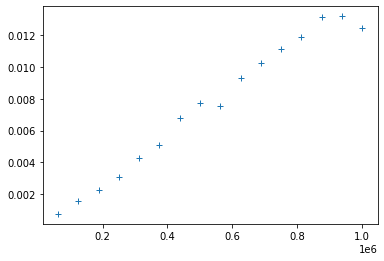

In [7]:
# 3. sur f1
trace(f1,1000000,10) #1000000 de valeurs et mélange 10fois
#temps proportionnel à la liste, fonction linéaire 

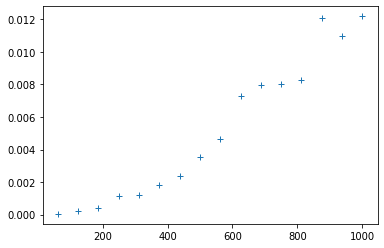

In [8]:
# 3. sur f2
trace(f2,1000,10)

#Parabole

4. Testez alors le triinsertion précédent dans le cas de données très mélangées et peu mélangées

In [9]:
def tri_insert(L):
    for i in range(len(L)):
        j = i
        while j > 0 and L[j-1] > L[j]:
            L[j-1], L[j] = L[j], L[j-1]
            j = j - 1
    return L

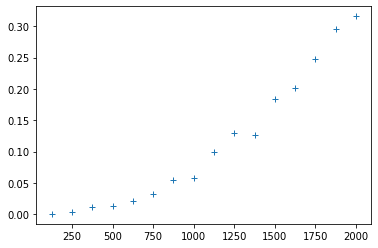

In [10]:
# 4. sur une liste bien mélangée
trace(tri_insert, 2000,5000)

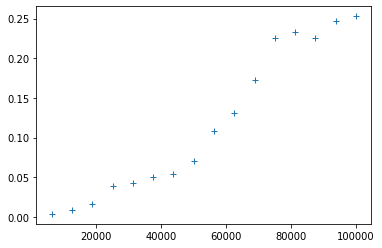

In [12]:
# 4.sur une liste peu mélangée
trace(tri_insert, 100000,10)

In [ ]:
'''def tri_dicho(L, n):
    
    for i in range (len(L)):
        L2 = L
        n = 0
        for y in range (n):
            j = len(L) // 2
            if L[i] < L2[j] :
                L2 = L2[:j]
            elif L[i] > L2[j]:
                L2 = L2[j:]
                n+= j
            else:
                break
        L = L[:i] + L[i:n] + L[i] + L[n:]'''
        